# Polynomial Logistic Regression From Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class PolynomialRegression():
    def __init__(self, degree, learning_rate, iterations, Lambda):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.Lambda = Lambda
        
    def transform(self, X):
        X_transformed = []
        x1 = X[:, 0].reshape(X.shape[0], 1)
        x2 = X[:, 1].reshape(X.shape[0], 1)
        for i in range(1, self.degree + 1):
            for j in range(0, i + 1):
                power_x1 = i - j
                power_x2 = j
                X_transformed.append((x1 ** power_x1) * (x2 ** power_x2))  
        return np.squeeze(np.array(X_transformed)).T
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def h_theta(self, X, theta):
        z = X.dot(theta)
        return self.sigmoid(z)

    def scale_features(self, X):
        mean = np.mean(X, axis = 0) 
        sd = np.std(X, axis = 0) 
        X_scaled = (X -  mean) / sd
        return X_scaled
    
    def batch_gradient_descent(self):
        m = len(self.X_train)
        theta = np.zeros((self.X_train.shape[1], 1))
        for iteration in range(self.iterations):
            gradients = 1 / m * (self.X_train.T.dot(self.h_theta(self.X_train, theta) - self.y_train) + self.Lambda * theta)
            theta -= self.learning_rate * gradients
        return theta
    
    def fit(self, X_train, y_train):
        X_transformed = self.transform(X_train)
        X_scaled = self.scale_features(X_transformed)
        self.X_train = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
        self.y_train = y_train.reshape((y_train.shape[0], 1))
        self.theta = self.batch_gradient_descent()
        
    def predict(self, X_test):
        X_transformed = self.transform(X_test)
        X_scaled = self.scale_features(X_transformed)
        X_test = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
        return np.where(self.h_theta(X_test, self.theta) > 0.5, 1.0, 0.0)

In [3]:
df =  pd.read_csv('./Data/Quality.csv')
df = df.sample(frac = 1)
X = df.iloc[:, [0, 1]].to_numpy()
y = df.iloc[:, 2].to_numpy()
split_ratio = 0.8
X_train = X[:int(split_ratio * X.shape[0])]
X_test = X[int(split_ratio * X.shape[0]):]
y_train = y[:int(split_ratio * y.shape[0])]
y_test = y[int(split_ratio * y.shape[0]):]

In [4]:
model = PolynomialRegression(6, 0.01, 4000, 0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
def accuracy_score(y_test, y_pred):
    accuracy = sum(y_test.squeeze() == y_pred.squeeze()) / len(y_test)
    return accuracy

In [6]:
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.8333333333333334


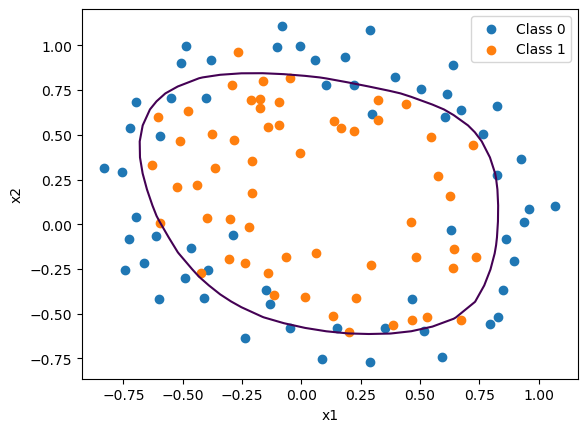

In [7]:
x1grid = np.linspace(-0.7, 1, 20)
x2grid = np.linspace(-0.7, 1, 20)
x1, x2 = np.meshgrid(x1grid, x2grid)
x1 = x1.flatten()
x2 = x2.flatten()
x1 = x1.reshape((len(x1), 1))
x2 = x2.reshape((len(x2), 1))
grid = np.hstack((x1, x2))
X_poly = model.transform(grid)
X_poly = model.scale_features(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
Z = X_poly.dot(model.theta)
U = x1.reshape((len(x1grid), len(x2grid)))
V = x2.reshape((len(x1grid), len(x2grid)))
Z = Z.reshape((len(x1grid), len(x2grid)))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label = 'Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label = 'Class 1')
plt.contour(U, V, Z, levels = [0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()